

# Project: Medical Apointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

Missed outpatient appointments are a common problem for clinics, and reducing their rate improves office efficiency, income, and resident education.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In this project, we intend to explore the dataset and identify specific reasons using the variables why some patients missed outpatient appointments and then provide insight into developing targeted approaches to reducing their rates.

### Data Dictionary

01 - PatientId - Identification of a patient

02 - AppointmentID - Identification of each appointment

03 - Gender - Male or Female

04 - Age - How old the patient is

05 - ScheduledDay - Date of Appointment Schedule

06 - AppointmentDay - Actual date of appointment

07 - Neighbourhood - Location of the hospital.

08 - Scholarship - True(1) or False(0) : Family allowance provided by the government of Brazil in an attempt to reduce short-term poverty.

09 - Hypertension -True(1) or False(0)

10 - Diabetes - True(1) or False(0)

11 - Alcoholism - True(1) or False(0)

12 - Handcap - True(1) or False(0)

13 - SMS_received -1 or more messages sent to the patient.

14 - No-show - ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")


## Data Wrangling

Let's load our dataset

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

Let's peep at oue data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Let's look out for null values in our dataset

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Our dataset contains no null value.

Let's explore the 'ScheduledDay' and the 'AppointmentDay' columns and see how we can transform them to be useful in our analysis.

In [7]:
df['ScheduledDay'].unique()[:10]

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', '2016-04-29T17:29:31Z',
       '2016-04-29T16:07:23Z', '2016-04-27T08:36:51Z',
       '2016-04-27T15:05:12Z', '2016-04-27T15:39:58Z',
       '2016-04-29T08:02:16Z', '2016-04-27T12:48:25Z'], dtype=object)

In [8]:
df['AppointmentDay'].unique()[:10]

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z'], dtype=object)

### Data Cleaning

We are going to drop the time portion of the attributes and work with the dates, while getting rid of the 'T' and 'Z' characters.

In [9]:
def date(x):
    return x.split('T')[0]

In [10]:
df['ScheduledDay'] = df['ScheduledDay'].apply(date)

In [11]:
df['AppointmentDay'] = df.AppointmentDay.apply(date)

In [12]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


We are going to convert the 'ScheduledDay' and 'AppointmentDay' from STRING to DATETIME format.

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [14]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

Let's convert the 'PatientId' column to string.

In [16]:
df['PatientId'] = df['PatientId'].astype(str)

In [17]:
df['PatientId'].value_counts()

822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
6264198675331.0      62
                     ..
862263621811.0        1
9267587227475.0       1
5764355598913.0       1
5712491287569.0       1
15576631729893.0      1
Name: PatientId, Length: 62299, dtype: int64

We can see that most patients visited the hoapital numerous times for different appointments

In [18]:
df['AppointmentID'] = df['AppointmentID'].astype(str)

In [19]:
df['AppointmentID'].value_counts()

5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64

Since there are unique appointment IDs throughout the dataset, we are going to drop the column.

In [20]:
df.drop('AppointmentID', axis = 1, inplace = True)

We are going to create another column named 'Sch_to_App' == Schedule to appointment date. This column describes the duration(in days) from the schedule date to the actual appointment date. This will help us to know if there is a relationship between the number of days to appointment and whether or not a patient showed up for the appointment. 

In [21]:
df['Sch_to_App'] = df['AppointmentDay'].subtract(df['ScheduledDay'])

In [22]:
df['Sch_to_App'].head(10)

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
5   2 days
6   2 days
7   2 days
8   0 days
9   2 days
Name: Sch_to_App, dtype: timedelta64[ns]

In [23]:
df[df['Sch_to_App'] == '0 days'][:2]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_to_App
0,29872499824296.0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,558997776694438.0,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days


From the dataframe above, there are patients who scheduled for and had appointment the same day.

In [24]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

From the dataset, there is a patient whose age is -1. This is impossible.

In [25]:
df[df['Age'] == -1]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_to_App
99832,465943158731293.0,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0 days


We are going to drop the row.

In [26]:
df.drop(99832, axis = 0, inplace = True)

In [27]:
df[df['Age'] == -1]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_to_App


Let's explore the unique values of each columns.

In [28]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [29]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [30]:
cols = {'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',  'SMS_received', 'No-show'}

for columns in cols:
    print(df[columns].unique())

[0 1]
['No' 'Yes']
[0 1]
[0 1]
[0 1]
[1 0]
[0 1 2 3 4]


In [31]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [32]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [33]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

According to the data dictionary, the 'SMS_received' column describes the number of messages sent to the patient prior to the appointment date. But from the dataframe, it is likely that the attributes for the 'SMS_received' column are exchanged for the 'Handicap' column. 

We are going to rename the 'Handicap' column as 'SMS_received' and the 'SMS_received' column as 'Handicap'

In [34]:
df.rename(columns = {'Handcap':'sms_recieved', 'SMS_received':'handicap' }, inplace = True)

In [35]:
df['sms_recieved'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [36]:
df['handicap'].unique()

array([0, 1], dtype=int64)

In [37]:
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   PatientId       110526 non-null  object         
 1   Gender          110526 non-null  object         
 2   ScheduledDay    110526 non-null  datetime64[ns] 
 3   AppointmentDay  110526 non-null  datetime64[ns] 
 4   Age             110526 non-null  int64          
 5   Neighbourhood   110526 non-null  object         
 6   Scholarship     110526 non-null  int64          
 7   Hypertension    110526 non-null  int64          
 8   Diabetes        110526 non-null  int64          
 9   Alcoholism      110526 non-null  int64          
 10  sms_recieved    110526 non-null  int64          
 11  handicap        110526 non-null  int64          
 12  No-show         110526 non-null  object         
 13  Sch_to_App      110526 non-null  timedelta64[ns]
dtypes: datetime64[ns](2)

<a id='eda'></a>
## Exploratory Data Analysis

Since our major concern is on whether or not the patients showed-up for appointments, we will partition the dataframe into two, patients who missed appointments and those who did not.



In [39]:
df_show = df[df['No-show'] == 'No']

In [40]:
df_no_show = df[df['No-show'] == 'Yes']

### Research Question 1 (What is the age Distribution of patients who did not show up for the medical appointments?)

Text(0.5, 1.0, 'Age distribution of patients absent on appointment date')

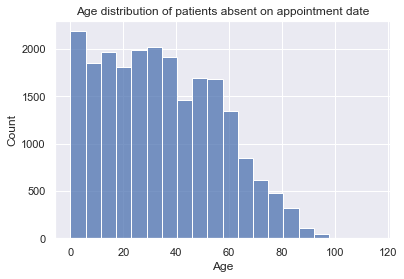

In [41]:


sns.histplot(df_no_show['Age'], bins = 20);

plt.title('Age distribution of patients absent on appointment date')

Most of the patients who did not show up for their appointments were below the age of 60.

### Research Question 2  (How many male and female patients were absent on the appointment day)

Text(0.5, 1.0, 'Males vs Females absent on appointment date')

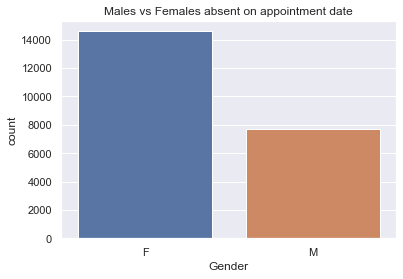

In [42]:
sns.countplot(x= df_no_show['Gender']);

plt.title('Males vs Females absent on appointment date')

More female than male patients were absent on appointment day

### Research Question 3 (What are the top 10 hospital locations with the most missed appointments?)

In [43]:
no_show_loc = pd.DataFrame(df_no_show['Neighbourhood'].value_counts()[:10])
no_show_loc.reset_index(inplace = True)
no_show_loc.rename(columns = {'index':'Hospital_loc', 'Neighbourhood':'No_of_missed_app'}, inplace = True)
no_show_loc

,Hospital_loc,No_of_missed_app
0,JARDIM CAMBURI,1465
1,MARIA ORTIZ,1219
2,ITARARÉ,923
3,RESISTÊNCIA,906
4,CENTRO,703
5,JESUS DE NAZARETH,696
6,JARDIM DA PENHA,631
7,CARATOÍRA,591
8,TABUAZEIRO,573
9,BONFIM,550


The above table lists the top 10 hospoial locations with the most missed appointments.

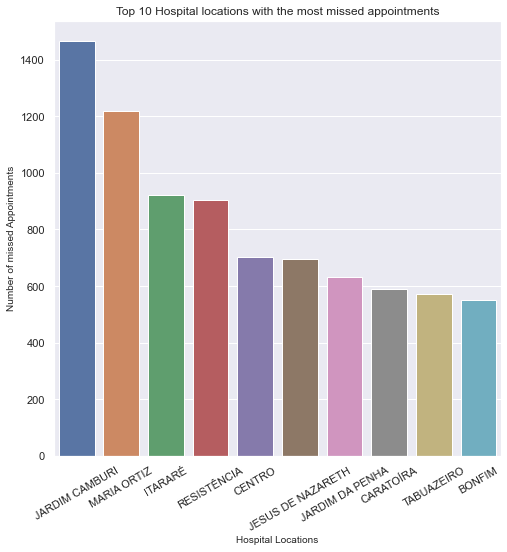

In [44]:
fig, ax = plt.subplots(figsize =(8,8))


sns.barplot(x = 'Hospital_loc', y = 'No_of_missed_app', data = no_show_loc)

plt.title('Top 10 Hospital locations with the most missed appointments', fontsize = 12)
plt.xlabel('Hospital Locations', fontsize = 10)
plt.ylabel('Number of missed Appointments', fontsize = 10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30);

The visual above shows the top 10 hospital locations with the most missed appointments.

### Research Question 4 (What are the top 10 hospital locations with the most showed-up appointments?)

In [45]:
show_loc = pd.DataFrame(df_show['Neighbourhood'].value_counts()[:10])
show_loc.reset_index(inplace = True)
show_loc.rename(columns = {'index':'Hospital_loc', 'Neighbourhood':'No_of_app'}, inplace = True)
show_loc

,Hospital_loc,No_of_app
0,JARDIM CAMBURI,6252
1,MARIA ORTIZ,4586
2,RESISTÊNCIA,3525
3,JARDIM DA PENHA,3246
4,SANTA MARTHA,2635
5,CENTRO,2631
6,ITARARÉ,2591
7,TABUAZEIRO,2559
8,SANTO ANTÔNIO,2262
9,BONFIM,2223


The table above lists the top 10 hospital locations with the most appointments.

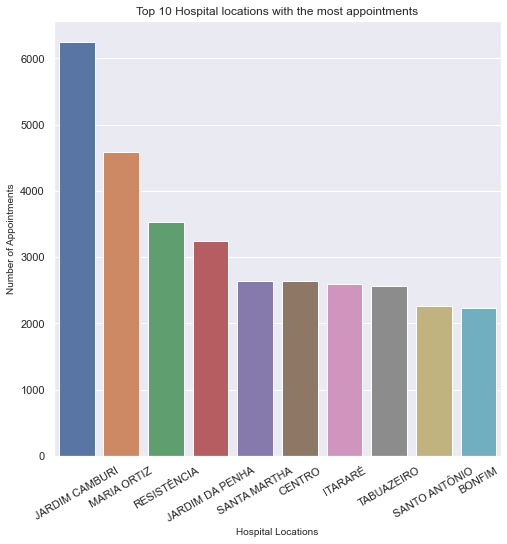

In [46]:
fig, ax = plt.subplots(figsize =(8,8))


sns.barplot(x = 'Hospital_loc', y = 'No_of_app', data = show_loc)

plt.title('Top 10 Hospital locations with the most appointments', fontsize = 12)
plt.xlabel('Hospital Locations', fontsize = 10)
plt.ylabel('Number of Appointments', fontsize = 10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30);

The visual above ranks the top 10 hospital locations by their number of appointments.

Some hospitals ranked high in both appointment missed and appointment met. This might be due to the patients population in those hospitals. 


### Research Question 5 (How does the duration from the appointment schedule date and the actual appointment date affect appoimtment show-up?)

In [47]:
df_dura = pd.DataFrame(df_no_show['Sch_to_App'].value_counts()[:10])
df_dura.reset_index(inplace = True)
df_dura.rename(columns = {'index':'duration', 'Sch_to_App':'counts'}, inplace = True)
df_dura.sort_values(by = 'duration',ignore_index = True )

,duration,counts
0,0 days,1792
1,1 days,1113
2,2 days,1602
3,3 days,644
4,4 days,1231
5,5 days,872
6,6 days,1001
7,7 days,1309
8,8 days,670
9,14 days,913


More patients who did not have enough time from the schedule to the actual appointment day missed the appointment, although that was the case for some day.

### Research Question 5 (Does Scholarship,	Hypertension, Diabetes,	Alcoholism,	Handcap, and SMS_received determine whether or not a patient will miss appointment? )

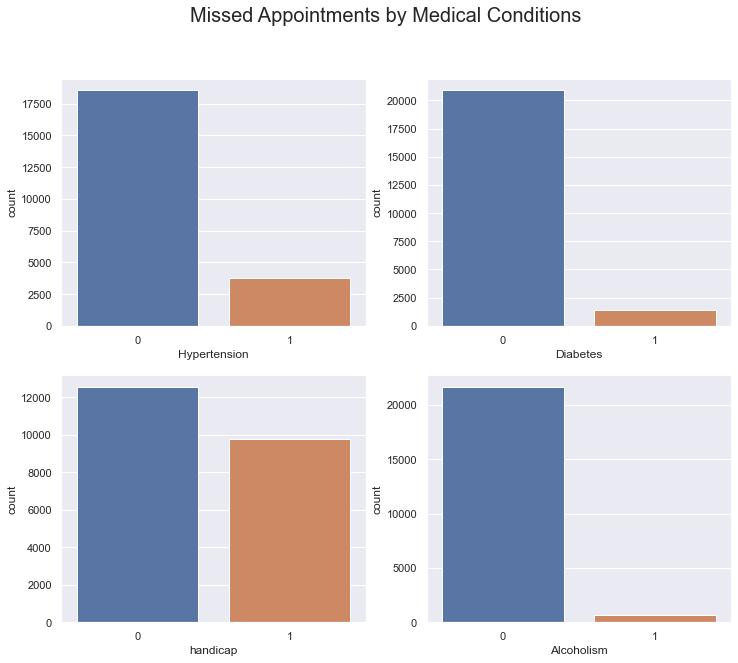

In [48]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))

sns.countplot(x = 'Hypertension', data = df_no_show, ax = axes[0][0] )

sns.countplot(x = 'Diabetes', data = df_no_show, ax = axes[0][1] )

sns.countplot(x = 'handicap', data = df_no_show, ax = axes[1][0] )

sns.countplot(x = 'Alcoholism', data = df_no_show, ax = axes[1][1] )


fig.suptitle('Missed Appointments by Medical Conditions', fontsize=20);






Patients who were not diabetic, hypertensive and those were not alcohol addicts tend to miss medical appointments than those who were. A large number of handicaped patients missed their appointments.


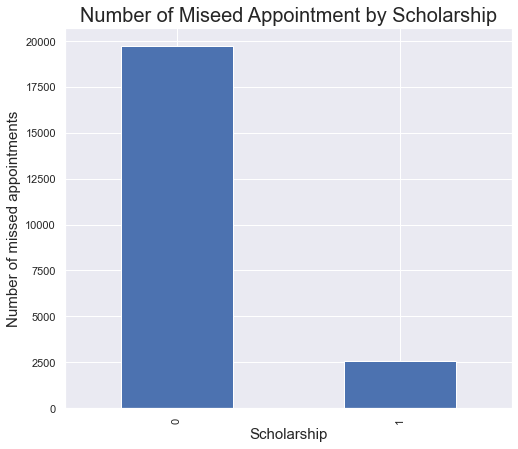

In [49]:
df_no_show['Scholarship'].value_counts().plot(kind = 'bar', figsize = (8,7));
plt.title('Number of Miseed Appointment by Scholarship', fontsize = 20)
plt.xlabel('Scholarship', fontsize = 15)
plt.ylabel('Number of missed appointments', fontsize = 15);

Most of the patients who did not keep up to their appointments we those not on sholarship

What about patients who did or did not recieve an sms as a reminder prior to their appointment date?

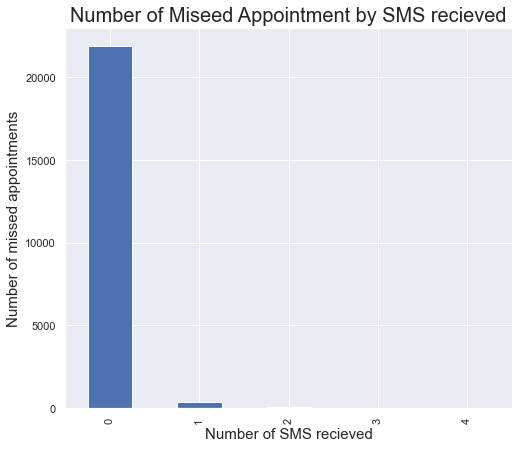

In [50]:
df_no_show['sms_recieved'].value_counts().plot(kind = 'bar', figsize = (8,7));
plt.title('Number of Miseed Appointment by SMS recieved', fontsize = 20)
plt.xlabel('Number of SMS recieved', fontsize = 15)
plt.ylabel('Number of missed appointments', fontsize = 15);

Most of the patients who missed did not show up on their appointments are those who did not recieve any sms. This is also clearly seen by the value counts below.

In [51]:
df_no_show['sms_recieved'].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: sms_recieved, dtype: int64

<a id='conclusions'></a>
## Conclusions


###      Results
###### Our data suggests that:
1. For patients whose the duration between the appointment schedule date and the actual appointment date are more than 2 days, an average of 2 SMSs shound be sent to the patients to improve appointment compliance. 

2. Patients who had chronic conditions like hypertension and diabetes tend to keep up to appointments knowing the consequence of not doing so, however, patients without these conditions should be reminded of their appointments to avoid leading to critical conditions.

3. Being Enrolled in the scholarship program seem to make patients more likely to show up to the appointment.

4. Most of the patients who did not show up to their appointment are below the age of 60.

###      Limitations
1. The statistics used here are descriptive and not inferential, hence, we did not create any hypotheses or inferences in our data.

2. We can not show strong correlations between the factors since most of our data are categorical.
